Mean Squared Error: 39.76720688079566


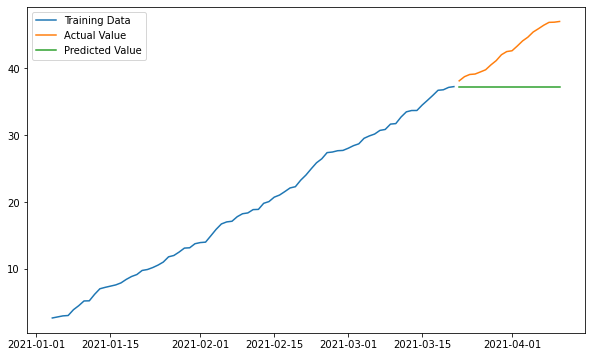

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming the DataFrame 'df' and the feature engineering part remains the same

# Sample data creation (for context)
np.random.seed(42)  # For reproducibility
df = pd.DataFrame({'date': pd.date_range(start='2021-01-01', periods=100, freq='D'),
                   'value': np.random.rand(100).cumsum()})

# Feature Engineering: Create lag features (the function definition remains the same)
def create_lag_features(df, column, lags):
    for lag in lags:
        df[f'lag_{lag}'] = df[column].shift(lag)
    return df

lags = [1, 2, 3]  # Example lag values
df = create_lag_features(df, 'value', lags)
df.dropna(inplace=True)  # Drop rows with NaN values created by lagging

# Split the data into training and testing sets (the splitting process remains the same)
split_ratio = 0.8
split_index = int(len(df) * split_ratio)
train, test = df[:split_index], df[split_index:]

# Separate features and target
X_train, y_train = train.drop(['date', 'value'], axis=1), train['value']
X_test, y_test = test.drop(['date', 'value'], axis=1), test['value']

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Plotting the results (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train['date'], train['value'], label='Training Data')
plt.plot(test['date'], test['value'], label='Actual Value')
plt.plot(test['date'], predictions, label='Predicted Value')
plt.legend()
plt.show()
